### Relatório de Seleção de Modelos de Machine Learning
Introdução

Após uma análise detalhada e uma extensa busca por modelos que melhor se adequassem ao nosso caso de uso, foram realizados diversos testes comparativos envolvendo diferentes algoritmos de classificação.

Resultados e Conclusão

Com base nos resultados obtidos, constatou-se que os modelos que apresentaram o melhor desempenho e foram usados para essa analise e criação são:

DecisionTreeClassifier

RandomForestClassifier

Ambos os modelos demonstraram elevada capacidade de generalização, boa precisão e adequação às características do conjunto de dados analisado. Assim, esses classificadores foram considerados os mais apropriados para o problema em questão.

In [1]:
import numpy as np

import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import random

import warnings
warnings.filterwarnings("ignore")

## Exploração Básica

In [2]:
df = pd.read_csv("water_potability_augmented.csv")
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,7.093382,196.348960,22077.020484,7.071628,333.802959,426.807937,14.235886,66.520047,3.946563,0.390100
std,3.085124,32.761913,8419.216687,3.215550,35.392750,77.543731,5.689394,17.026185,1.628012,0.487777
min,3.442510,114.236366,5416.238724,3.203082,237.136957,269.422947,6.452487,28.524993,2.161414,0.000000
25%,3.675567,174.179496,16144.860895,3.330869,310.469129,371.835529,8.492785,54.767587,2.199628,0.000000
50%,7.036752,196.377740,21891.102960,7.145098,333.389426,426.104457,14.196324,66.575913,3.929456,0.000000
75%,10.493744,218.745213,27791.545660,10.653649,357.227378,480.391490,20.039049,78.330169,5.709118,1.000000
max,10.812925,278.062602,45974.106490,10.967153,429.028139,617.626558,22.090049,104.606299,5.741640,1.000000


In [3]:
lista_colunas = df.columns.tolist()
print(lista_colunas)

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


In [4]:
df.count()

ph                 50000
Hardness           50000
Solids             50000
Chloramines        50000
Sulfate            50000
Conductivity       50000
Organic_carbon     50000
Trihalomethanes    50000
Turbidity          50000
Potability         50000
dtype: int64

In [5]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,10.493744,162.800397,25669.380712,9.678974,368.145535,434.656554,6.452487,51.529949,5.739600,1
1,10.812925,176.965311,17520.815129,10.653649,307.040354,547.598811,12.544227,89.527580,5.709118,0
2,4.126529,125.474884,11215.945902,5.366011,261.444798,445.241457,18.575921,86.433655,4.460201,0
3,3.442510,194.998424,6151.833328,10.653649,320.738066,486.445895,11.104004,80.190000,2.199628,0
4,10.493744,210.138071,30981.374502,3.203082,352.185588,334.777643,21.445835,96.192844,2.161414,1


In [6]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
49995,3.442510,164.693243,35463.708597,10.653649,284.933446,269.422947,16.794680,82.295338,5.709118,0
49996,8.305014,166.743953,9896.311236,10.599467,399.972775,459.829134,6.452487,83.280370,2.161414,1
49997,10.493744,205.923437,26288.922642,7.785306,403.434237,329.317811,19.257011,48.972378,5.739600,1
49998,8.783168,218.032840,16183.586649,7.390474,334.053885,389.021616,16.354520,47.100982,4.274137,0
49999,5.423966,180.247383,22774.189486,3.406198,355.492551,380.425769,13.088682,37.935514,5.709118,0


Entendimento
* Potabilidade = 0, Água Potável Insegura
* Potabilidade = 1, Água Potável Segura

In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,7.093382,196.348960,22077.020484,7.071628,333.802959,426.807937,14.235886,66.520047,3.946563,0.390100
std,3.085124,32.761913,8419.216687,3.215550,35.392750,77.543731,5.689394,17.026185,1.628012,0.487777
min,3.442510,114.236366,5416.238724,3.203082,237.136957,269.422947,6.452487,28.524993,2.161414,0.000000
25%,3.675567,174.179496,16144.860895,3.330869,310.469129,371.835529,8.492785,54.767587,2.199628,0.000000
50%,7.036752,196.377740,21891.102960,7.145098,333.389426,426.104457,14.196324,66.575913,3.929456,0.000000
75%,10.493744,218.745213,27791.545660,10.653649,357.227378,480.391490,20.039049,78.330169,5.709118,1.000000
max,10.812925,278.062602,45974.106490,10.967153,429.028139,617.626558,22.090049,104.606299,5.741640,1.000000


In [8]:
# Calculando a porcentagem de valores ausentes em cada coluna
porcentagem_vazios = df.isna().sum() / len(df) * 100
print(porcentagem_vazios)

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64


#### Com base nas informações apresentadas na no gráfico abaixo, é evidente que não existem alguns valores nulos ou ausentes. O comando a seguir pode ser usado para determinar a contagem de valores ausentes em cada coluna respectiva.


<Axes: >

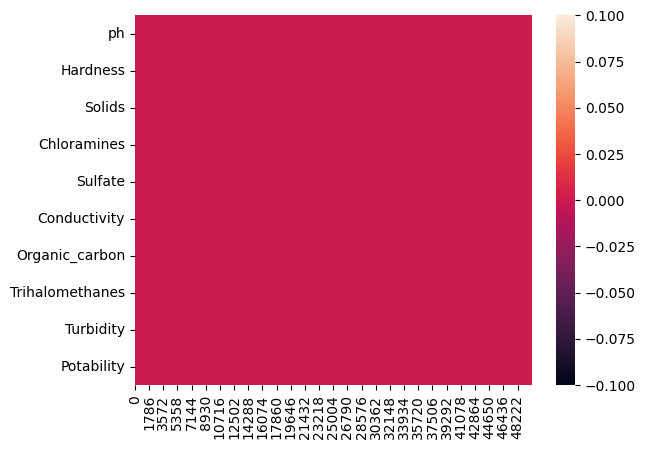

In [9]:
#Criando um mapa de calor para visualizar a distribuição de valores ausentes nas colunas do df transposto valores entre colunas no df transposto
sns.heatmap(df.isna().transpose())

In [10]:
#Calculando a assimetria para cada coluna no df
skew_values = df.skew()
print(skew_values)

ph                 0.010482
Hardness          -0.006077
Solids             0.170529
Chloramines       -0.020152
Sulfate            0.000468
Conductivity       0.094854
Organic_carbon     0.005333
Trihalomethanes   -0.012402
Turbidity          0.006859
Potability         0.450633
dtype: float64


## Alvinho
#### 0 - não ta legal
#### 1 - tá legal


In [11]:
# vendo a distribuição da nossa vriavel target
df["Potability"].value_counts()

Potability
0    30495
1    19505
Name: count, dtype: int64

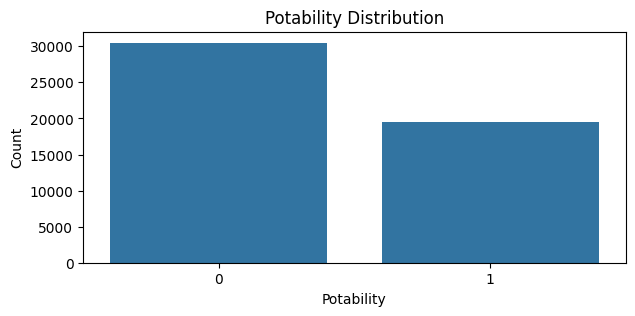

In [12]:
# diferença olhando para um gráfico
plt.figure(figsize = (7,3))
sns.countplot(x = "Potability", data = df)
plt.xlabel("Potability")
plt.ylabel("Count")
plt.title("Potability Distribution")
plt.show()

In [13]:
# Agrupando pela target e vendo quais o valores médios refente a todas as outras colunas
df.groupby("Potability").mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.095493,196.612474,21864.579680,7.026113,334.478652,427.421840,14.337627,66.388101,3.955481
1,7.090081,195.936969,22409.160054,7.142788,332.746549,425.848134,14.076819,66.726337,3.932619


#### relações entre variáveis para determinar​​ quais pares de colunas têm conexões mais fortes e mais fracas em termos de associação linear.


In [14]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.018712,-0.014666,-0.002306,-0.002624,0.003596,0.004615,0.001389,-0.001483,-0.000856
Hardness,0.018712,1.000000,-0.050348,-0.005291,-0.078248,-0.021982,0.004234,-0.009321,0.004686,-0.010057
Solids,-0.014666,-0.050348,1.000000,-0.010690,-0.135371,0.015153,0.003160,-0.011328,0.006316,0.031551
Chloramines,-0.002306,-0.005291,-0.010690,1.000000,0.003531,-0.006901,-0.001233,-0.006177,0.005018,0.017699
Sulfate,-0.002624,-0.078248,-0.135371,0.003531,1.000000,-0.016090,0.010717,-0.018588,0.014662,-0.023872
Conductivity,0.003596,-0.021982,0.015153,-0.006901,-0.016090,1.000000,0.002543,-0.002762,0.001706,-0.009899
Organic_carbon,0.004615,0.004234,0.003160,-0.001233,0.010717,0.002543,1.000000,-0.009538,-0.001838,-0.022360
Trihalomethanes,0.001389,-0.009321,-0.011328,-0.006177,-0.018588,-0.002762,-0.009538,1.000000,-0.003850,0.009690
Turbidity,-0.001483,0.004686,0.006316,0.005018,0.014662,0.001706,-0.001838,-0.003850,1.000000,-0.006850
Potability,-0.000856,-0.010057,0.031551,0.017699,-0.023872,-0.009899,-0.022360,0.009690,-0.006850,1.000000


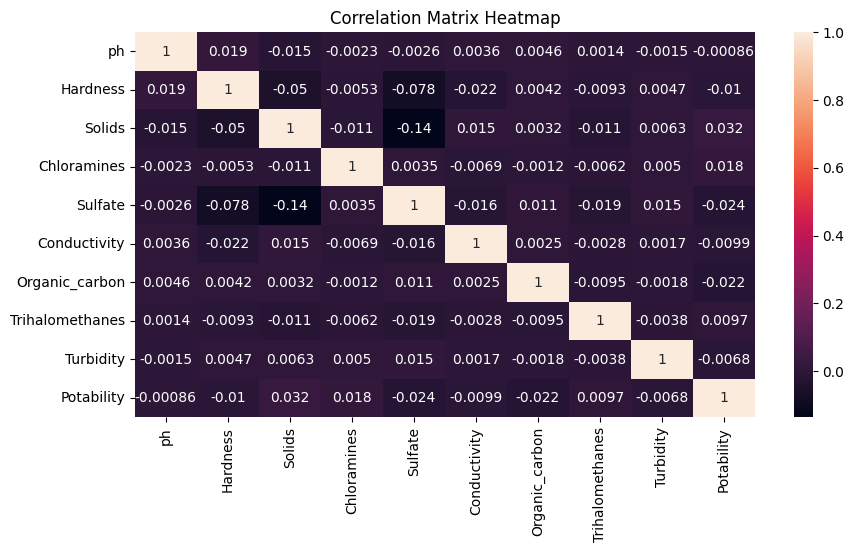

In [15]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation Matrix Heatmap")
plt.show()



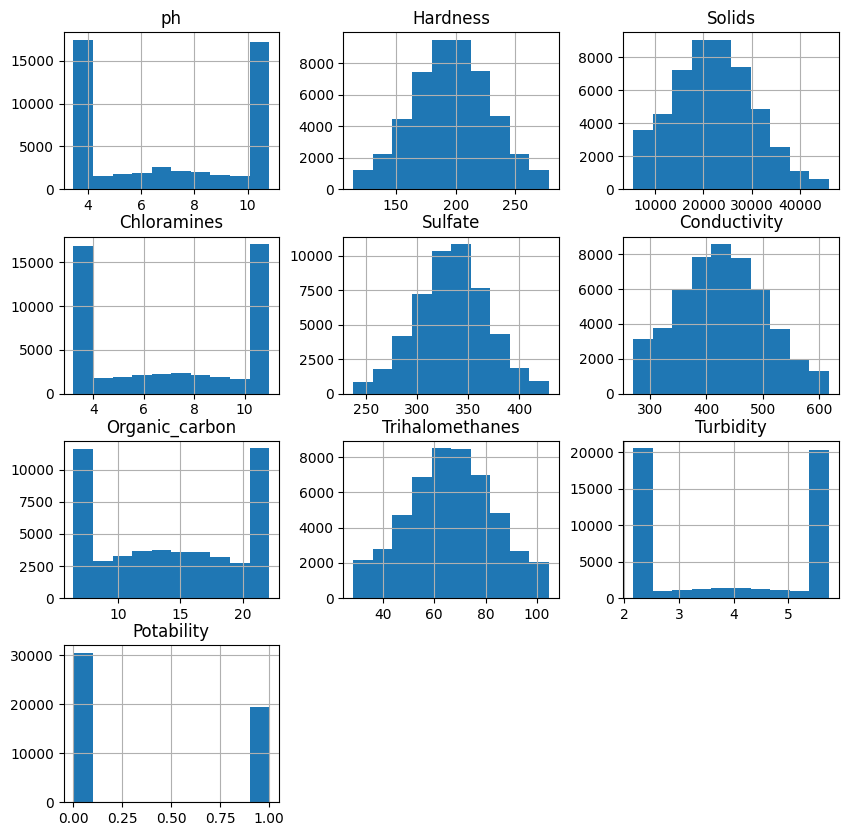

In [16]:
df.hist(figsize=(10,10))
plt.show()

## Dividindo a Variável Característica e a Variável-Alvo

In [17]:
X = df.drop(['Potability'],axis=1)
Y = df['Potability']
X_train , X_test , y_train , y_test = train_test_split(X , Y, test_size=0.25, random_state=42)

In [18]:
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'])

,count,mean,std,min,25%,50%,75%,max
ph,19505.000000,7.090081,2.970990,3.442510,3.675567,7.045156,10.493744,10.812925
Hardness,19505.000000,195.936969,34.622885,114.236366,172.179237,195.793044,219.657294,278.062602
Solids,19505.000000,22409.160054,8639.358883,5416.238724,16351.732593,22254.954700,28263.437876,45974.106490
Chloramines,19505.000000,7.142788,3.326802,3.203082,3.203082,7.244541,10.967153,10.967153
Sulfate,19505.000000,332.746549,39.980634,237.136957,305.716252,332.123444,359.706172,429.028139
Conductivity,19505.000000,425.848134,78.430556,269.422947,369.692698,424.753954,480.493153,617.626558
Organic_carbon,19505.000000,14.076819,5.683575,6.452487,8.256937,14.100680,20.136377,22.090049
Trihalomethanes,19505.000000,66.726337,17.211963,28.524993,54.838703,66.750192,78.622845,104.606299
Turbidity,19505.000000,3.932619,1.646900,2.161414,2.161414,3.891097,5.739600,5.741640
Potability,19505.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'])

,count,mean,std,min,25%,50%,75%,max
ph,30495.000000,7.095493,3.156008,3.442510,3.442510,7.035456,10.812925,10.812925
Hardness,30495.000000,196.612474,31.511797,114.236366,175.225265,196.648569,218.174199,278.062602
Solids,30495.000000,21864.579680,8268.490603,5416.238724,16034.018667,21690.824976,27475.251963,45974.106490
Chloramines,30495.000000,7.026113,3.141537,3.203082,3.330869,7.086469,10.653649,10.967153
Sulfate,30495.000000,334.478652,32.098918,237.136957,313.045553,333.883210,355.771551,429.028139
Conductivity,30495.000000,427.421840,76.966164,269.422947,373.167535,426.892607,480.288879,617.626558
Organic_carbon,30495.000000,14.337627,5.690875,6.452487,8.640401,14.248748,19.970926,22.090049
Trihalomethanes,30495.000000,66.388101,16.905251,28.524993,54.722102,66.529382,78.147045,104.606299
Turbidity,30495.000000,3.955481,1.615780,2.161414,2.199628,3.955091,5.709118,5.741640
Potability,30495.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
df[['ph','Sulfate','Trihalomethanes']].describe().T

,count,mean,std,min,25%,50%,75%,max
ph,50000.0,7.093382,3.085124,3.442510,3.675567,7.036752,10.493744,10.812925
Sulfate,50000.0,333.802959,35.392750,237.136957,310.469129,333.389426,357.227378,429.028139
Trihalomethanes,50000.0,66.520047,17.026185,28.524993,54.767587,66.575913,78.330169,104.606299



## Dimensionamento de recursos.  first import é aqui

Scaler = você cria um objeto que sabe calcular a média e o desvio padrão de cada coluna.

fit → calcula a média e o desvio padrão de cada coluna de X.
transform → aplica a fórmula de padronização do Nosso professor Daniel


In [21]:
X = df.drop(['Potability'],axis=1)
Y = df['Potability']
X_stdscle = StandardScaler().fit_transform(X.values)

## Dividindo o conjunto de dados em conjuntos de treinamento e teste


In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 42)

## Modelo 1: Classificador de Árvore de Decisão

#### RESULTADO 1

In [23]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,splitter='best')

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, y_pred))

Train accuracy: 93.74
Test Accuracy: 93.8
Confusion Matrix:
[[6093    6]
 [ 614 3287]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      6099
           1       1.00      0.84      0.91      3901

    accuracy                           0.94     10000
   macro avg       0.95      0.92      0.93     10000
weighted avg       0.94      0.94      0.94     10000



#### RESULTADO 2

In [24]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=12,splitter='random')

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, y_pred))

Train accuracy: 83.61
Test Accuracy: 83.21
Confusion Matrix:
[[5879  220]
 [1459 2442]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.96      0.88      6099
           1       0.92      0.63      0.74      3901

    accuracy                           0.83     10000
   macro avg       0.86      0.79      0.81     10000
weighted avg       0.85      0.83      0.82     10000



#### RESULTADO 3


In [25]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=12,splitter='best')

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, y_pred))

Train accuracy: 97.04
Test Accuracy: 96.89999999999999
Confusion Matrix:
[[6087   12]
 [ 298 3603]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      6099
           1       1.00      0.92      0.96      3901

    accuracy                           0.97     10000
   macro avg       0.98      0.96      0.97     10000
weighted avg       0.97      0.97      0.97     10000



<table style="width:80%">
    <tr>
        <th  style='text-align:center'>Parametros</th>
        <th  style='text-align:center'>Acc</th>
    </tr>
    <tr>
        <td  style='text-align:center'>criterion:entropy,max_depth:3,splitter:best</td>
        <td  style='text-align:center'>Train: 93.74 , Test:93.8 </td>
    </tr>
    <tr>
        <td  style='text-align:center'>criterion:entropy,max_depth:12,splitter:random</td>
        <td  style='text-align:center'>Train: 91.14 , Test:89.94</td>
    </tr>
    <tr>
        <td  style='text-align:center'>criterion:entropy,max_depth:12,splitter:best</td>
        <td  style='text-align:center'>Train: 97.04 , Test: 96.88</td>
    </tr>

In [26]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

#R2
from sklearn.metrics import r2_score 
print(r2_score(y_test,y_pred))

0.031
0.17606816861659008
0.031
0.8697051920253357


Text(50.722222222222214, 0.5, 'Prediction Label')

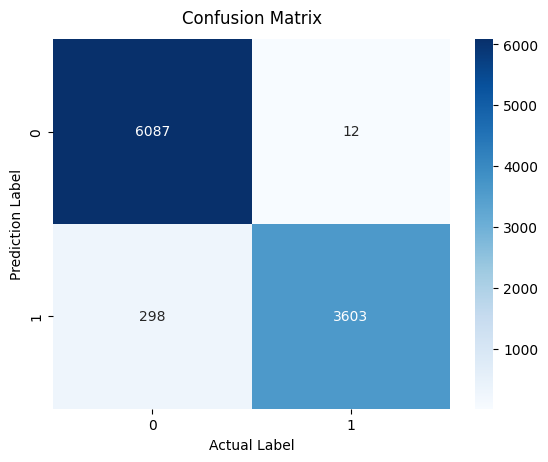

In [27]:
sns.heatmap(data=confusion_matrix(y_test, clf.predict(x_test)), annot = True, cmap="Blues",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

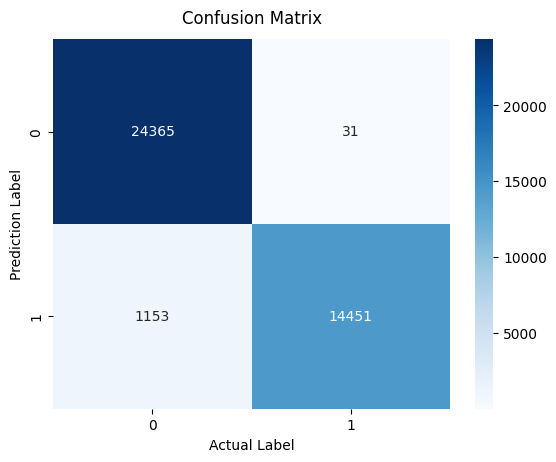

In [28]:
sns.heatmap(data=confusion_matrix(y_train, clf.predict(x_train)), annot = True, cmap="Blues",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

treino acc: 93.74%
teste acc: 93.80%


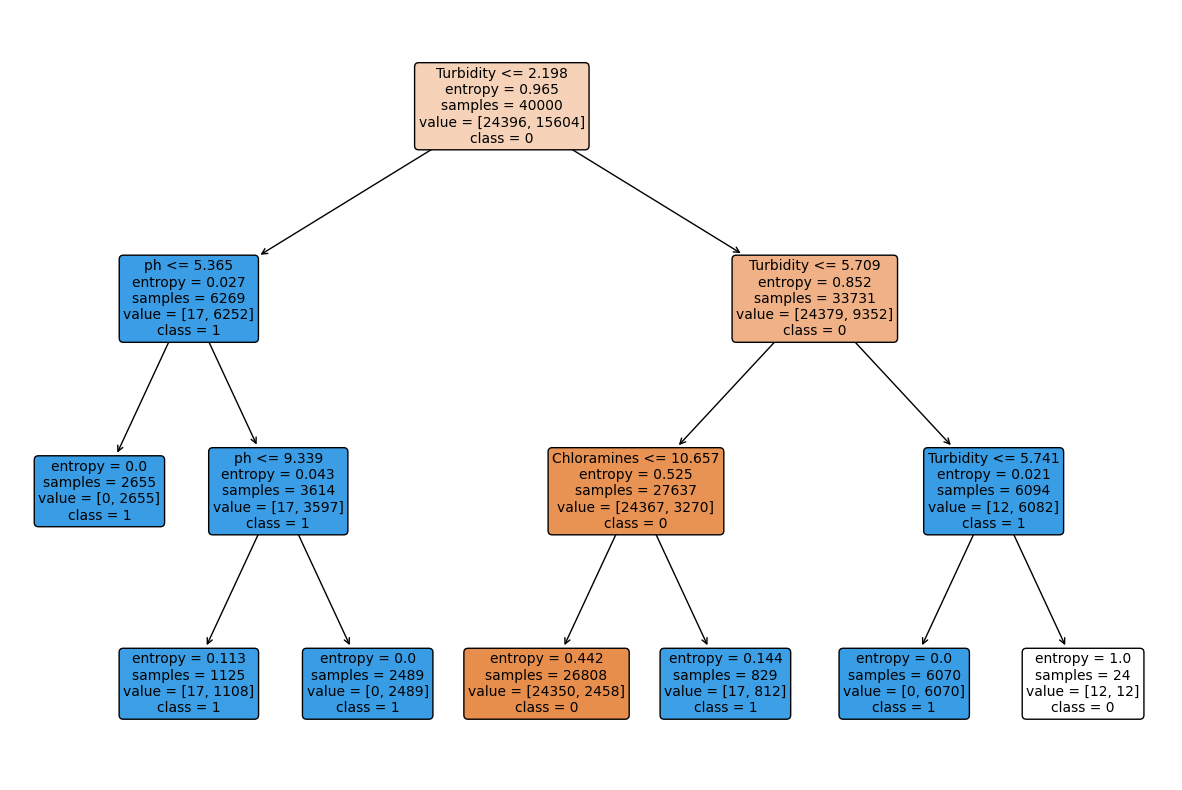

In [29]:
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train, y_train)

print(f"treino acc: {metrics.accuracy_score(y_train, model.predict(x_train)) * 100:.2f}%")
print(f"teste acc: {metrics.accuracy_score(y_test, model.predict(x_test)) * 100:.2f}%")

fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(
    model,
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(y_train.unique())], 
    filled=True,     
    impurity=True,    # mostra impureza (entropia)
    rounded=True,     # deixa os nós com cantos arredondados
    fontsize=10     # melhora leitura
)
plt.show()

## Modelo 2: Classificador Random Forest

#### RESULTADO 1

In [30]:
classifier = RandomForestClassifier(n_estimators = 150,criterion='entropy',max_depth = 10)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)

In [31]:
resultado = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(resultado)
resultado1 = classification_report(y_test, rf_pred)
print("Classification Report:",)
print (resultado1)
resultado2 = accuracy_score(y_test,rf_pred)*100
print("Accuracy:",resultado2)

Confusion Matrix:
[[6077   22]
 [ 335 3566]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6099
           1       0.99      0.91      0.95      3901

    accuracy                           0.96     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.97      0.96      0.96     10000

Accuracy: 96.43


#### RESULTADO 2


In [32]:
classifier = RandomForestClassifier(n_estimators = 500,criterion='entropy',max_depth = 8)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)

In [33]:

resultado = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(resultado)
resultado1 = classification_report(y_test, rf_pred)
print("Classification Report:",)
print (resultado1)
resultado2 = accuracy_score(y_test,rf_pred)*100
print("Accuracy:",resultado2)

Confusion Matrix:
[[6076   23]
 [ 376 3525]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6099
           1       0.99      0.90      0.95      3901

    accuracy                           0.96     10000
   macro avg       0.97      0.95      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Accuracy: 96.00999999999999


#### RESULTADO 3

In [34]:

def validacao_cruzada(X, Y, tam=10):
    lista_accuracy = []

    for i in range(tam):
        seed = random.randint(1, 100)
        x_train, x_test, y_train, y_test = train_test_split(
            X, Y, test_size=0.2, stratify=Y, random_state=seed
        )

        classifier = RandomForestClassifier(
            n_estimators=100,
            criterion='entropy',
            max_depth=None,
            random_state=seed
        )

        classifier.fit(x_train, y_train)
        rf_pred = classifier.predict(x_test)
        resultado = accuracy_score(y_test, rf_pred) * 100
        lista_accuracy.append(resultado)

    return lista_accuracy

a = validacao_cruzada(X, Y, tam=10)
print(a)
print(f"Média da acurácia: {sum(a)/len(a):.2f}%")


[98.04, 98.32, 98.06, 98.02, 98.11999999999999, 98.19, 97.82, 97.98, 98.03, 98.37]
Média da acurácia: 98.09%


In [35]:
classifier = RandomForestClassifier(n_estimators = 100,criterion='entropy',max_depth = None)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)

## comando de serialização do melhor modelo encontradp 


In [36]:
# import pickle
# with open("model.pkl", "wb") as f:
#     pickle.dump(classifier, f)

In [37]:
resultado = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(resultado)
resultado1 = classification_report(y_test, rf_pred)
print("Classification Report:",)
print (resultado1)
resultado2 = accuracy_score(y_test,rf_pred)*100
print("Accuracy:",resultado2)

Confusion Matrix:
[[6038   61]
 [ 125 3776]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6099
           1       0.98      0.97      0.98      3901

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy: 98.14


<table style="width:80%">
    <tr>
        <th  style='text-align:center'>Parametros</th>
        <th  style='text-align:center'>Acc</th>
    </tr>
    <tr>
        <td  style='text-align:center'>criterion:entropy,max_depth:10,n_estimators:150</td>
        <td  style='text-align:center'>97.07</td>
    </tr>
    <tr>
        <td  style='text-align:center'>criterion:entropy,max_depth:8,n_estimators:500</td>
        <td  style='text-align:center'>96.04</td>
    </tr>
    <tr>
        <td  style='text-align:center'>criterion:entropy,max_depth:None,n_estimators:100</td>
        <td  style='text-align:center'>98.24</td>
    </tr>

In [38]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, rf_pred))

# RMSEuyh
print(np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, rf_pred))

#R2
from sklearn.metrics import r2_score 
print(r2_score(y_test,rf_pred))

0.0186
0.13638181696985854
0.0186
0.9218231152152014


Text(50.722222222222214, 0.5, 'Prediction Label')

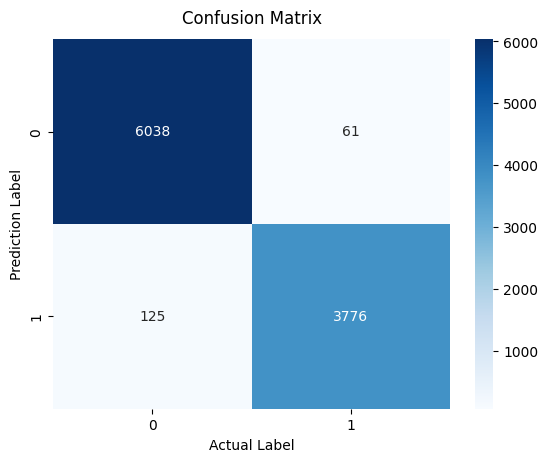

In [39]:
sns.heatmap(data=confusion_matrix(y_test, classifier.predict(x_test)), annot = True, cmap="Blues",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

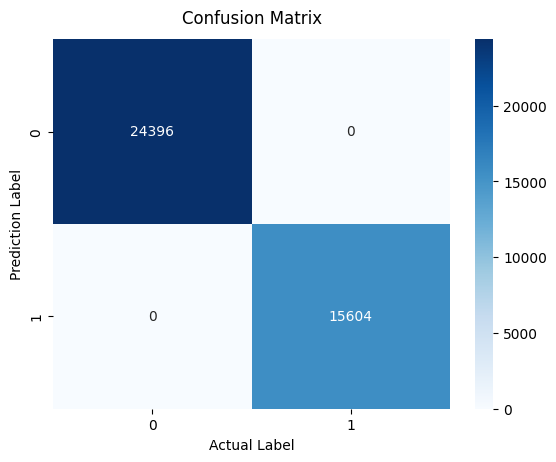

In [40]:
sns.heatmap(data=confusion_matrix(y_train, classifier.predict(x_train)), annot = True, cmap="Blues",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

In [41]:
importances=pd.DataFrame({'feature':X_train.columns,'importance':np.round(classifier.feature_importances_,3)})
importances=importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(100)

,importance
feature,
Turbidity,0.392
Chloramines,0.246
ph,0.226
Organic_carbon,0.077
Sulfate,0.024
Hardness,0.010
Solids,0.010
Conductivity,0.008
Trihalomethanes,0.007


<Axes: xlabel='feature'>

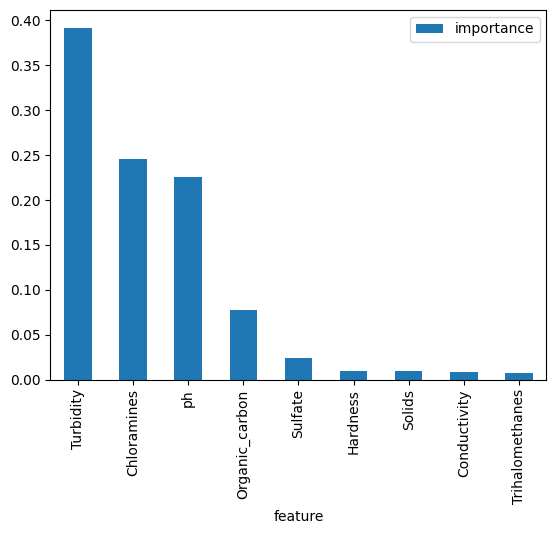

In [42]:
importances.plot.bar()